In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'to code - Copy - 2.xlsx'  # Update this path to your actual file location
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Select only the relevant columns
data = data[['P_SEXE', 'P_GRAGE', 'D_HREDE']]

# Display the first few rows of the data
print("Data Overview:")
print(data.head())
print("\nColumn Names:")
print(data.columns)


Data Overview:
   P_SEXE  P_GRAGE  D_HREDE
0       1       14      930
1       1       14     1030
2       1       14     1200
3       1       14     1300
4       1       14     1400

Column Names:
Index(['P_SEXE', 'P_GRAGE', 'D_HREDE'], dtype='object')


In [2]:
# Cell 2: Preprocess Data
# Normalize selected columns using MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split data into features (X) and target (y)
X = scaled_data.drop(columns=['P_GRAGE'])  # Use all columns except 'P_GRAGE' as input
y = scaled_data[['P_GRAGE']]  # Use 'P_GRAGE' as the target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete. Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")


Data preprocessing complete. Shapes:
X_train: (9740, 2), y_train: (9740, 1)


In [3]:
# Cell 3: Define and Train the Neural Network
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 64 neurons
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

print("Model training complete.")


Epoch 1/50


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 - 2s - 7ms/step - loss: 0.1041 - mae: 0.2652 - val_loss: 0.0832 - val_mae: 0.2435
Epoch 2/50
244/244 - 0s - 2ms/step - loss: 0.0830 - mae: 0.2405 - val_loss: 0.0826 - val_mae: 0.2434
Epoch 3/50
244/244 - 0s - 2ms/step - loss: 0.0816 - mae: 0.2387 - val_loss: 0.0824 - val_mae: 0.2418
Epoch 4/50
244/244 - 0s - 2ms/step - loss: 0.0808 - mae: 0.2372 - val_loss: 0.0812 - val_mae: 0.2405
Epoch 5/50
244/244 - 0s - 2ms/step - loss: 0.0800 - mae: 0.2361 - val_loss: 0.0822 - val_mae: 0.2407
Epoch 6/50
244/244 - 1s - 2ms/step - loss: 0.0799 - mae: 0.2359 - val_loss: 0.0809 - val_mae: 0.2400
Epoch 7/50
244/244 - 0s - 2ms/step - loss: 0.0800 - mae: 0.2363 - val_loss: 0.0805 - val_mae: 0.2396
Epoch 8/50
244/244 - 0s - 2ms/step - loss: 0.0797 - mae: 0.2356 - val_loss: 0.0807 - val_mae: 0.2398
Epoch 9/50
244/244 - 1s - 2ms/step - loss: 0.0796 - mae: 0.2359 - val_loss: 0.0810 - val_mae: 0.2401
Epoch 10/50
244/244 - 0s - 2ms/step - loss: 0.0795 - mae: 0.2357 - val_loss: 0.0803 - val_mae: 0.2393


In [4]:
# Cell 4: Tune and Retrain the Neural Network
# Redefine the model with more neurons and layers
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Increased neurons
    Dropout(0.3),
    Dense(64, activation='relu'),  # Added complexity with another layer
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model with the same optimizer and loss
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Retrain the model with more epochs
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs for further training
    batch_size=32,
    validation_split=0.2,
    verbose=2
)

print("Model tuning and retraining complete.")


Epoch 1/100


C:\Users\TanMeh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


244/244 - 2s - 8ms/step - loss: 0.0954 - mae: 0.2556 - val_loss: 0.0820 - val_mae: 0.2419
Epoch 2/100
244/244 - 0s - 2ms/step - loss: 0.0829 - mae: 0.2407 - val_loss: 0.0818 - val_mae: 0.2420
Epoch 3/100
244/244 - 1s - 2ms/step - loss: 0.0816 - mae: 0.2379 - val_loss: 0.0824 - val_mae: 0.2432
Epoch 4/100
244/244 - 0s - 2ms/step - loss: 0.0805 - mae: 0.2369 - val_loss: 0.0815 - val_mae: 0.2407
Epoch 5/100
244/244 - 0s - 2ms/step - loss: 0.0800 - mae: 0.2359 - val_loss: 0.0807 - val_mae: 0.2401
Epoch 6/100
244/244 - 1s - 2ms/step - loss: 0.0798 - mae: 0.2361 - val_loss: 0.0805 - val_mae: 0.2396
Epoch 7/100
244/244 - 0s - 2ms/step - loss: 0.0795 - mae: 0.2356 - val_loss: 0.0808 - val_mae: 0.2406
Epoch 8/100
244/244 - 1s - 2ms/step - loss: 0.0793 - mae: 0.2355 - val_loss: 0.0802 - val_mae: 0.2392
Epoch 9/100
244/244 - 0s - 2ms/step - loss: 0.0788 - mae: 0.2348 - val_loss: 0.0795 - val_mae: 0.2385
Epoch 10/100
244/244 - 1s - 2ms/step - loss: 0.0787 - mae: 0.2344 - val_loss: 0.0810 - val_mae

In [5]:
# Cell 5: Evaluate the Tuned Model
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")


77/77 - 0s - 3ms/step - loss: 0.0732 - mae: 0.2279
Test Loss: 0.0732, Test MAE: 0.2279


In [6]:
# Cell 6: Generate Synthetic Data from Scratch
# Generate random normalized inputs for the selected features
random_input = np.random.uniform(0, 1, (1000, X_train.shape[1]))  # 1000 synthetic samples
synthetic_output = model.predict(random_input)  # Predict outputs using the trained model

# Combine inputs and outputs to create a synthetic dataset
synthetic_data = pd.DataFrame(random_input, columns=X.columns)
synthetic_data['P_GRAGE'] = synthetic_output

print("Synthetic data generated from scratch:")
print(synthetic_data.head())


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Synthetic data generated from scratch:
     P_SEXE   D_HREDE   P_GRAGE
0  0.759950  0.467738  0.614828
1  0.264515  0.702042  0.502513
2  0.010687  0.659469  0.476901
3  0.398663  0.572464  0.476079
4  0.809082  0.172209  0.409971


In [7]:
# Cell 7: Post-Process Synthetic Data
# Reverse scale synthetic data to match the original data range
synthetic_data = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=data.columns)

# Ensure 'P_SEXE' is either 1 or 2
synthetic_data['P_SEXE'] = synthetic_data['P_SEXE'].round().clip(1, 2).astype(int)

# Ensure 'P_GRAGE' values are integers and within the original data range
synthetic_data['P_GRAGE'] = synthetic_data['P_GRAGE'].round().clip(
    data['P_GRAGE'].min(), data['P_GRAGE'].max()).astype(int)

print("Post-processed synthetic data:")
print(synthetic_data.head())


Post-processed synthetic data:
   P_SEXE  P_GRAGE      D_HREDE
0       2        9  1725.370426
1       1       12  1412.012078
2       1       11  1340.553277
3       1       10  1338.260873
4       2        4  1153.820167


Plot saved: plots\P_SEXE_comparison_plot.png


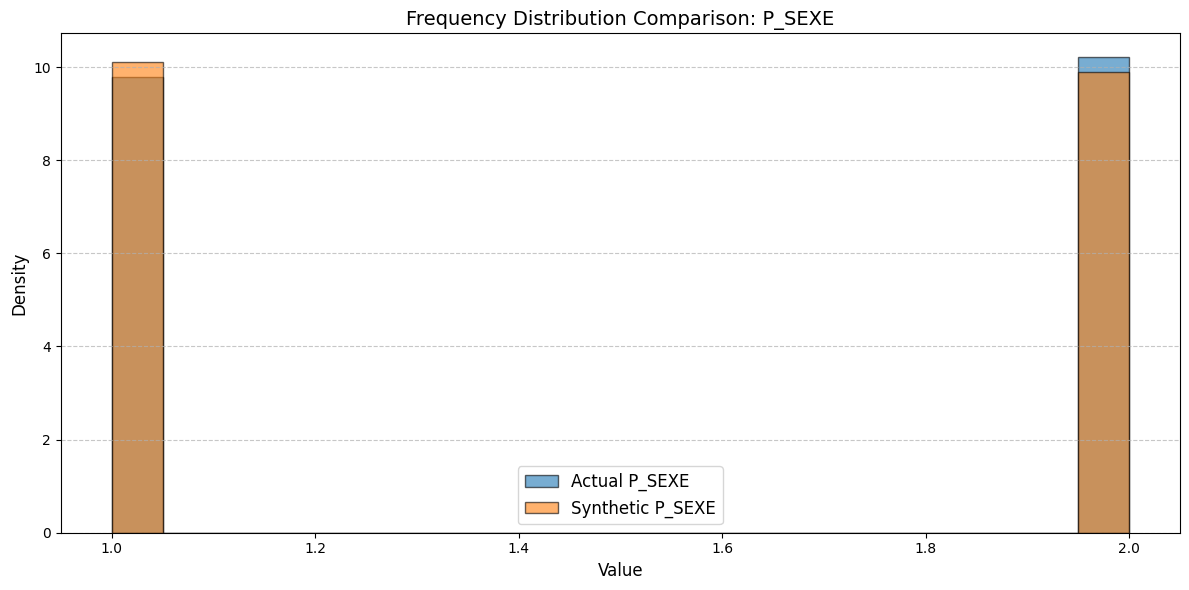

Plot saved: plots\P_GRAGE_comparison_plot.png


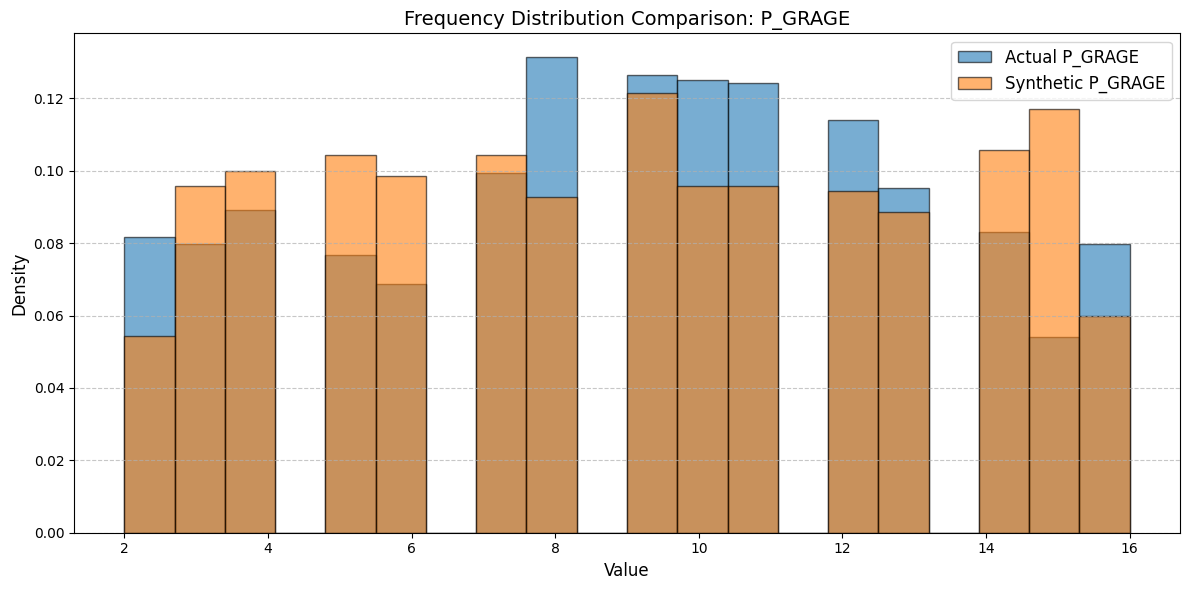

Plot saved: plots\D_HREDE_comparison_plot.png


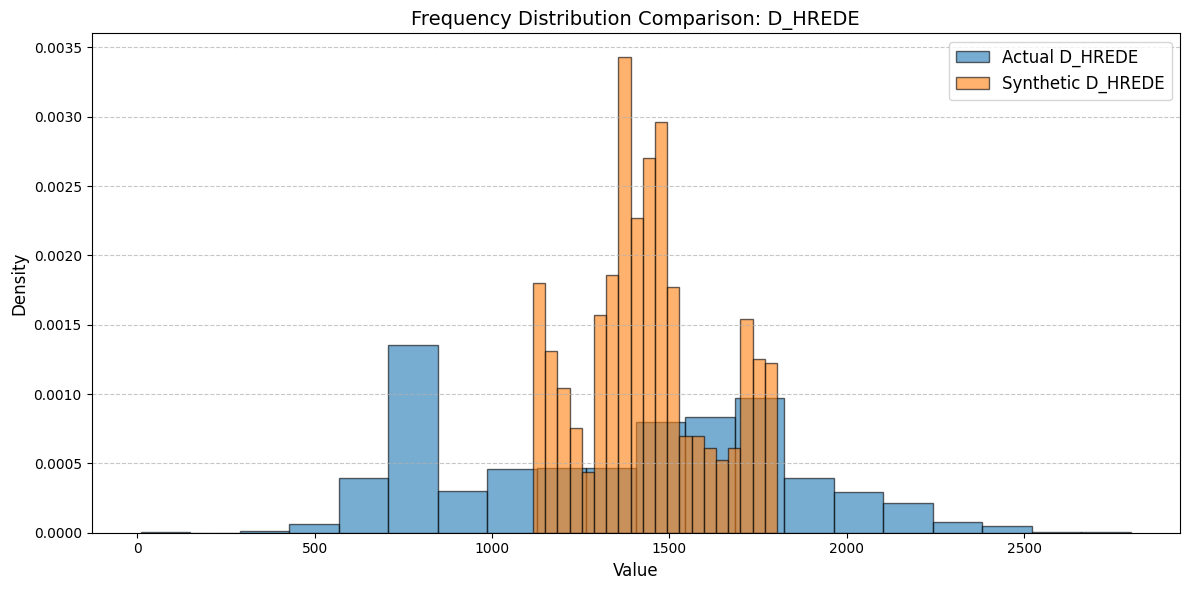

In [15]:
# Cell 8: Compare Frequency Distributions for Selected Data Columns and Save Plots
import os

# Directory to save plots
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Get the selected column names
columns_to_compare = ['P_SEXE', 'P_GRAGE', 'D_HREDE']

# Iterate over each selected column for comparison
for column in columns_to_compare:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Filter data for the actual and synthetic datasets
    actual_filtered = data[column]
    synthetic_filtered = synthetic_data[column]
    
    # Plot histograms
    ax.hist(actual_filtered, bins=20, density=True, alpha=0.6, label=f'Actual {column}', edgecolor='black')
    ax.hist(synthetic_filtered, bins=20, density=True, alpha=0.6, label=f'Synthetic {column}', edgecolor='black')

    # Add titles, labels, legend, and grid
    ax.set_title(f'Frequency Distribution Comparison: {column}', fontsize=14)
    ax.set_xlabel('Value', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save the plot to a file
    plot_path = os.path.join(plots_dir, f'{column}_comparison_plot.png')
    plt.savefig(plot_path)
    print(f"Plot saved: {plot_path}")
    
    # Display the plot
    plt.tight_layout()
    plt.show()



In [9]:
# Cell 9: Compare Frequency Distributions in Words for Selected Columns
def compare_frequencies_in_words(original, synthetic, column_name):
    """
    Compare frequency distributions of original and synthetic data in words.
    """
    print(f"\nFrequency comparison for {column_name}:")
    print("Original Data Distribution:")
    print(original.value_counts(normalize=True).sort_index())
    print("\nSynthetic Data Distribution:")
    print(synthetic.value_counts(normalize=True).sort_index())
    print("\nSummary Statistics:")
    print("Original Data Summary:")
    print(original.describe())
    print("\nSynthetic Data Summary:")
    print(synthetic.describe())

# Compare for each selected column
columns_to_compare = ['P_SEXE', 'P_GRAGE', 'D_HREDE']
for col in columns_to_compare:
    print(col)
    print('-' * 100)
    compare_frequencies_in_words(data[col], synthetic_data[col], col)
    print('-' * 100)


P_SEXE
----------------------------------------------------------------------------------------------------

Frequency comparison for P_SEXE:
Original Data Distribution:
P_SEXE
1    0.489363
2    0.510637
Name: proportion, dtype: float64

Synthetic Data Distribution:
P_SEXE
1    0.505
2    0.495
Name: proportion, dtype: float64

Summary Statistics:
Original Data Summary:
count    12175.000000
mean         1.510637
std          0.499907
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: P_SEXE, dtype: float64

Synthetic Data Summary:
count    1000.000000
mean        1.495000
std         0.500225
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: P_SEXE, dtype: float64
----------------------------------------------------------------------------------------------------
P_GRAGE
------------------------------------------------------------------------------------------

In [12]:
!pip install python-docx

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------------------------------- ------- 3.1/3.8 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 14.2 MB/s eta 0:00:00


In [13]:
from docx import Document

# Cell 9: Compare Frequency Distributions in Words for Selected Columns and Save Report
def compare_frequencies_in_words(original, synthetic, column_name, doc):
    """
    Compare frequency distributions of original and synthetic data in words,
    and add the results to a Word document.
    """
    doc.add_heading(f"Frequency Comparison for {column_name}", level=2)
    
    # Original Data Distribution
    doc.add_heading("Original Data Distribution:", level=3)
    original_dist = original.value_counts(normalize=True).sort_index()
    for val, freq in original_dist.items():
        doc.add_paragraph(f"Value: {val}, Frequency: {freq:.4f}")
    
    # Synthetic Data Distribution
    doc.add_heading("Synthetic Data Distribution:", level=3)
    synthetic_dist = synthetic.value_counts(normalize=True).sort_index()
    for val, freq in synthetic_dist.items():
        doc.add_paragraph(f"Value: {val}, Frequency: {freq:.4f}")
    
    # Summary Statistics
    doc.add_heading("Summary Statistics:", level=3)
    doc.add_paragraph("Original Data Summary:")
    doc.add_paragraph(str(original.describe()))
    doc.add_paragraph("Synthetic Data Summary:")
    doc.add_paragraph(str(synthetic.describe()))

# Create a Word document
report_doc = Document()
report_doc.add_heading("Frequency Comparison Report", level=1)

# Compare for each selected column and add to the report
columns_to_compare = ['P_SEXE', 'P_GRAGE', 'D_HREDE']
for col in columns_to_compare:
    compare_frequencies_in_words(data[col], synthetic_data[col], col, report_doc)

# Save the Word document
report_file_path = 'frequency_comparison_report.docx'
report_doc.save(report_file_path)

print(f"Frequency comparison report saved successfully as '{report_file_path}'.")


Frequency comparison report saved successfully as 'frequency_comparison_report.docx'.


In [14]:
# Cell 10: Save Synthetic Data to CSV
output_csv_path = 'synthetic_data_p-sexe-p-grage-dhrede.csv'  # Specify the output filename
synthetic_data.to_csv(output_csv_path, index=False)

print(f"Synthetic data saved successfully as '{output_csv_path}'.")


Synthetic data saved successfully as 'synthetic_data_p-sexe-p-grage-dhrede.csv'.
